# Week 8-2 DTM을 활용한 텍스트 분류 - 영어

In [1]:
# 데이터 읽기

import os
import pandas as pd

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week8')
review_df=pd.read_csv("thinq_e_review_result.csv")

review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  
0      ['app', 'longer', 'work', 'updated', 'tell', '...  
1      ['everything', 'worked', 'fine', 'week', 'ago'...  
2      ['app', 'work', 'wired', 'tv', 'connection', '...  
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...  
4      ['embarrassing', 'absolutely', 'connect', 'goo...  
...                                                  ...  
11275                   ['good', 'app', 'useful', 'far']  
11276                 ['helpful', 'hope', 'stay', 'way']  
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']  
11278                      ['error', 'routed', 'device']  
11279                ['connected', 'washing', 'machine']  

[11280 rows x 5 columns]

In [2]:
review_df['comment_n_str']=review_df['comment_n'].apply(lambda x: " ".join(eval(x)))
review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  \
0      ['app', 'longer', 'work', 'updated', 'tell', '...   
1      ['everything', 'worked', 'fine', 'week', 'ago'...   
2      ['app', 'work', 'wired', 'tv', 'connection', '...   
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...   
4      ['embarrassing', 'absolutely', 'connect', 'goo...   
...                                                  ...   
11275                   ['good', 'app', 'useful', 'far']   
11276                 ['helpful', 'hope', 'stay', 'way']   
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']   
11278                      ['error', 'routed', 'device']   
11279                ['connected', 'washing', 'machine']   

                                           comment_n_str  
0      app longer work updated tell login incorrect t...  
1      everything worked fine week ago connect oven a...  
2      app work wired tv connection edit tried app tv...  
3      trying alexa connection turn lg tv webos tv lg...  
4      embarrassing absolutely connect google home de...  
...                                                  ...  
11275                                good app useful far  
11276                              helpful hope stay way  
11277                  worked like gave feedback wanting  
11278                                error routed device  
11279                          connected washing machine  

[11280 rows x 6 columns]

In [4]:
review_df['star'].value_counts()

1    5318
5    2559
2    1164
3    1127
4    1112
Name: star, dtype: int64

In [5]:
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10153, 6)

In [6]:
del_index

Int64Index([    8,    32,    63,    70,    73,   101,   106,   108,   123,
              124,
            ...
            11134, 11140, 11148, 11149, 11199, 11218, 11239, 11254, 11265,
            11274],
           dtype='int64', length=1127)

In [7]:
review_df=review_df[review_df['star']!=3]

In [8]:
review_df.shape

(10153, 6)

In [7]:
del_index

Int64Index([    8,    32,    63,    70,    73,   101,   106,   108,   123,
              124,
            ...
            11134, 11140, 11148, 11149, 11199, 11218, 11239, 11254, 11265,
            11274],
           dtype='int64', length=1127)

<AxesSubplot:>

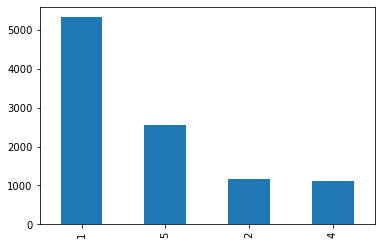

In [9]:
review_df['star'].value_counts().plot(kind='bar')

In [10]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  \
0      ['app', 'longer', 'work', 'updated', 'tell', '...   
1      ['everything', 'worked', 'fine', 'week', 'ago'...   
2      ['app', 'work', 'wired', 'tv', 'connection', '...   
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...   
4      ['embarrassing', 'absolutely', 'connect', 'goo...   
...                                                  ...   
11275                   ['good', 'app', 'useful', 'far']   
11276                 ['helpful', 'hope', 'stay', 'way']   
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']   
11278                      ['error', 'routed', 'device']   
11279                ['connected', 'washing', 'machine']   

                                           comment_n_str  sentiment  
0      app longer work updated tell login incorrect t...          0  
1      everything worked fine week ago connect oven a...          0  
2      app work wired tv connection edit tried app tv...          0  
3      trying alexa connection turn lg tv webos tv lg...          0  
4      embarrassing absolutely connect google home de...          0  
...                                                  ...        ...  
11275                                good app useful far          1  
11276                              helpful hope stay way          1  
11277                  worked like gave feedback wanting          1  
11278                                error routed device          0  
11279                          connected washing machine          0  

[10153 rows x 7 columns]

<AxesSubplot:>

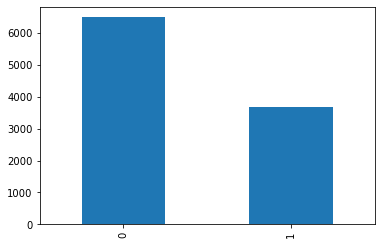

In [11]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

In [12]:
# 훈련 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(review_df['comment_n_str'], review_df['sentiment'], test_size=0.3, random_state=12)
print('train data set size = {0},  test data set size = {1}'.format(x_train.shape[0],x_test.shape[0]))

train data set size = 7107,  test data set size = 3046


In [13]:
# TF-IDF 벡터화

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english', strip_accents='unicode', norm='l2')
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [14]:
X_train.shape

(7107, 11402)

In [15]:
X_test.shape

(3046, 11402)

In [16]:
# 나이브 베이지안 분류 모델 생성과 예측

from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB().fit(X_train, y_train)
y_predicted_NB = clf_NB.predict(X_test)

In [17]:
# 의사결정나무 분류 모델 생성과 예측

from sklearn import tree
clf_DT = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_predicted_DT = clf_DT.predict(X_test)

In [18]:
#SGD 분류 모델 생성과 예측

from sklearn.linear_model import SGDClassifier
clf_SGD = SGDClassifier(alpha=.0001).fit(X_train, y_train)
y_predicted_SGD = clf_SGD.predict(X_test)

In [19]:
# SVM 모델 생성과 예측

from sklearn.svm import LinearSVC
clf_SVM = LinearSVC(class_weight="balanced").fit(X_train, y_train)
y_predicted_SVM = clf_SVM.predict(X_test)

In [20]:
# Random Forest 분류 모델 생성과 예측

from sklearn.ensemble import RandomForestClassifier
clf_RFA = RandomForestClassifier(n_estimators=10)
clf_RFA.fit(X_train, y_train)
y_predicted_RFA = clf_RFA.predict(X_test)

In [21]:
# 나이브 베이지안 분류 모델 성능 평가

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print (' \n confusion_matrix NB \n ')
cm = confusion_matrix(y_test, y_predicted_NB)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_NB))

 
 confusion_matrix NB 
 
[[1890   63]
 [ 328  765]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1953
           1       0.92      0.70      0.80      1093

    accuracy                           0.87      3046
   macro avg       0.89      0.83      0.85      3046
weighted avg       0.88      0.87      0.87      3046



In [22]:
# 의사결정나무 분류 모델 성능 평가

print (' \n confusion_matrix DT \n ')
cm = confusion_matrix(y_test, y_predicted_DT)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_DT))

 
 confusion_matrix DT 
 
[[1639  314]
 [ 283  810]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1953
           1       0.72      0.74      0.73      1093

    accuracy                           0.80      3046
   macro avg       0.79      0.79      0.79      3046
weighted avg       0.81      0.80      0.80      3046



In [23]:
# SGD 분류 모델 성능 평가

print (' \n confusion_matrix SGD \n ')
cm = confusion_matrix(y_test, y_predicted_SGD)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_SGD))

 
 confusion_matrix SGD 
 
[[1831  122]
 [ 223  870]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1953
           1       0.88      0.80      0.83      1093

    accuracy                           0.89      3046
   macro avg       0.88      0.87      0.87      3046
weighted avg       0.89      0.89      0.89      3046



In [24]:
# SVM 분류 모델 성능 평가

print (' \n confusion_matrix SVM\n ')
cm = confusion_matrix(y_test, y_predicted_SVM)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_SVM))

 
 confusion_matrix SVM
 
[[1794  159]
 [ 192  901]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1953
           1       0.85      0.82      0.84      1093

    accuracy                           0.88      3046
   macro avg       0.88      0.87      0.87      3046
weighted avg       0.88      0.88      0.88      3046



In [25]:
#Random Forest 분류 모델 성능 평가

print (' \n confusion_matrix RFA \n ')
cm = confusion_matrix(y_test, y_predicted_RFA)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_RFA))


 
 confusion_matrix RFA 
 
[[1848  105]
 [ 355  738]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1953
           1       0.88      0.68      0.76      1093

    accuracy                           0.85      3046
   macro avg       0.86      0.81      0.83      3046
weighted avg       0.85      0.85      0.84      3046

